Let's start with some imports

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import matplotlib.colors as mcolors
from shapely.geometry import Polygon
from matplotlib.colors import ListedColormap

#### Loading dataset with voting protocols from every voting station in second round of the election

In [2]:
# Load the CSV with semicolon separator
df = pd.read_csv("protokoly_po_obwodach_w_drugiej_turze_utf8.csv", sep=";", encoding="utf-8")

#### I would like to make a plot visualising how the turnout correlates to Nawrocki's (later also called 'kibol') and Trzaskowski's (later called 'Bonżur') vote shares

In [3]:
G = df.iloc[:,10].to_numpy()
N = df.iloc[:,31].to_numpy()
T = df.iloc[:,32].to_numpy()
X = (N + T) / G
denominator = N + T
with np.errstate(divide='ignore', invalid='ignore'):
    yT = np.divide(T, denominator, out=np.zeros_like(T), where=denominator!=0)
    yN = np.divide(N, denominator, out=np.zeros_like(N), where=denominator!=0)
#[df['Typ obszaru']=='wieś']

<Figure size 1000x500 with 0 Axes>

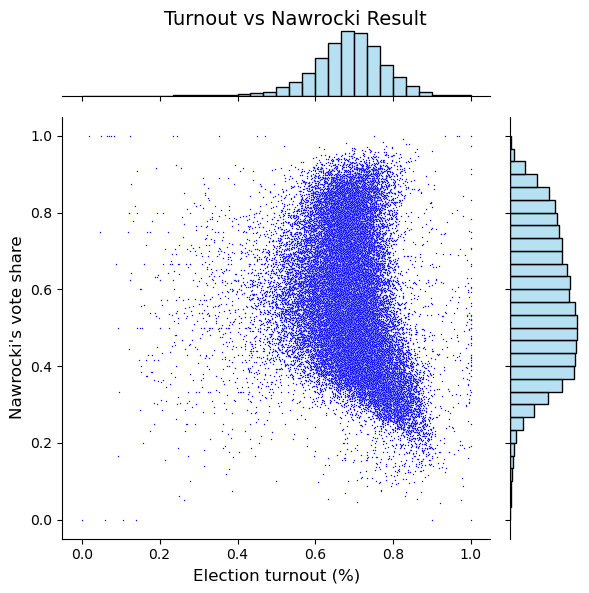

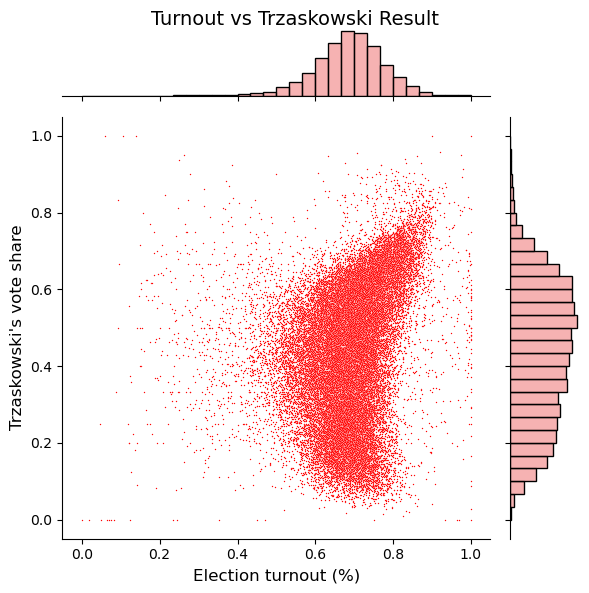

In [4]:
# Assuming X = turnout (%), yN = Nawrocki, yT = Trzaskowski
plt.figure(figsize=(10,5))

# Nawrocki scatter with marginal histograms
g1 = sns.jointplot(
    x=X, y=yN,
    kind="scatter",
    marginal_kws=dict(bins=30, fill=True, color="skyblue", alpha=0.6),
    color="blue",
    height=6,
    s=1
)
g1.set_axis_labels("Election turnout (%)", "Nawrocki's vote share", fontsize=12)
g1.fig.suptitle("Turnout vs Nawrocki Result", fontsize=14)
g1.fig.tight_layout()
g1.fig.subplots_adjust(top=0.95)

# Trzaskowski scatter with marginal histograms
g2 = sns.jointplot(
    x=X, y=yT,
    kind="scatter",
    marginal_kws=dict(bins=30, fill=True, color="lightcoral", alpha=0.6),
    color="red",
    height=6,
    s=1
)
g2.set_axis_labels("Election turnout (%)", "Trzaskowski's vote share", fontsize=12)
g2.fig.suptitle("Turnout vs Trzaskowski Result", fontsize=14)
g2.fig.tight_layout()
g2.fig.subplots_adjust(top=0.95)

plt.show()

#### Here we have it! 
#### Let's do the same but on one plot. We can graph the score of the winner in each polling station vs turnout.

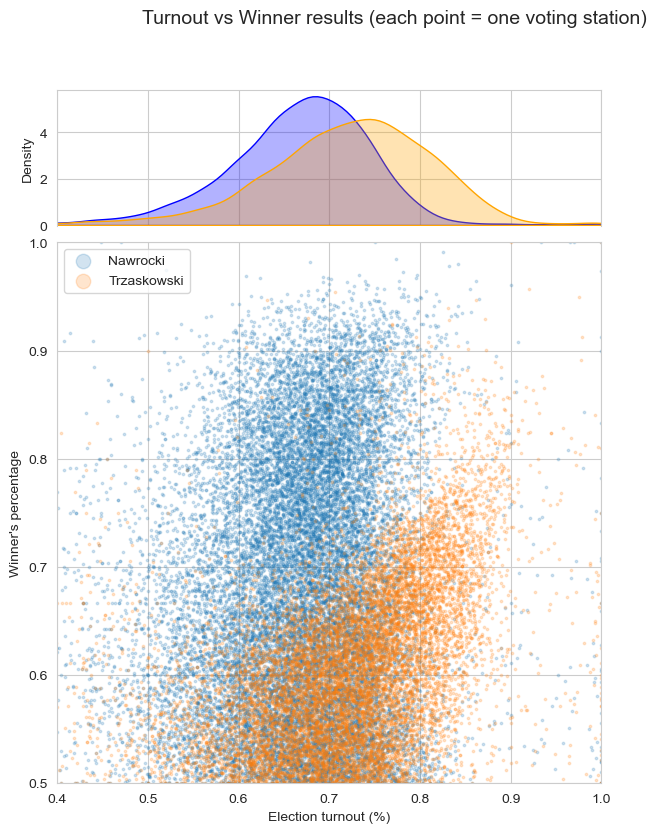

In [5]:
# Replace these with your real arrays / Series
X = np.asarray(X)
yN = np.asarray(yN)
yT = np.asarray(yT)

sns.set_style("whitegrid")

fig = plt.figure(figsize=(9,9))
gs = fig.add_gridspec(2, 2,
                      width_ratios=(4, 1),
                      height_ratios=(1, 4),
                      hspace=0.05, wspace=0.05)

ax_joint  = fig.add_subplot(gs[1, 0])
ax_marg_x = fig.add_subplot(gs[0, 0], sharex=ax_joint)

# --- MAIN: two scatters ---
ax_joint.scatter(X, yN, s=3, color="tab:blue", alpha=0.2, label="Nawrocki")
ax_joint.scatter(X, yT, s=3, color="tab:orange",  alpha=0.2, label="Trzaskowski")
ax_joint.set_xlabel("Election turnout (%)")
ax_joint.set_ylabel("Winner's percentage")
ax_joint.legend(frameon=True, loc="upper left", markerscale=6, fontsize=10)

# --- TOP marginal: turnout KDE (shares X with joint) ---
sns.kdeplot(x=X[yN>yT], fill=True, alpha=0.3, ax=ax_marg_x, color="blue")
sns.kdeplot(x=X[yT>yN], fill=True, alpha=0.3, ax=ax_marg_x, color="orange")
ax_marg_x.set_ylabel("Density")
plt.setp(ax_marg_x.get_xticklabels(), visible=False)   # hide x tick labels on top marginal


# Remove marginal spines clutter
ax_marg_x.spines['bottom'].set_visible(False)
ax_joint.set_ylim(0.5, 1)    # Fix y-axis for scatter plot
ax_joint.set_xlim(0.4, 1)    # Fix x-axis for scatter plot
ax_marg_x.set_xlim(0.4, 1)   # Fix x-axis for right marginal

fig.suptitle("Turnout vs Winner results (each point = one voting station)", fontsize=14, y=0.97)
plt.show()

#### Now we can do another another version of this plot

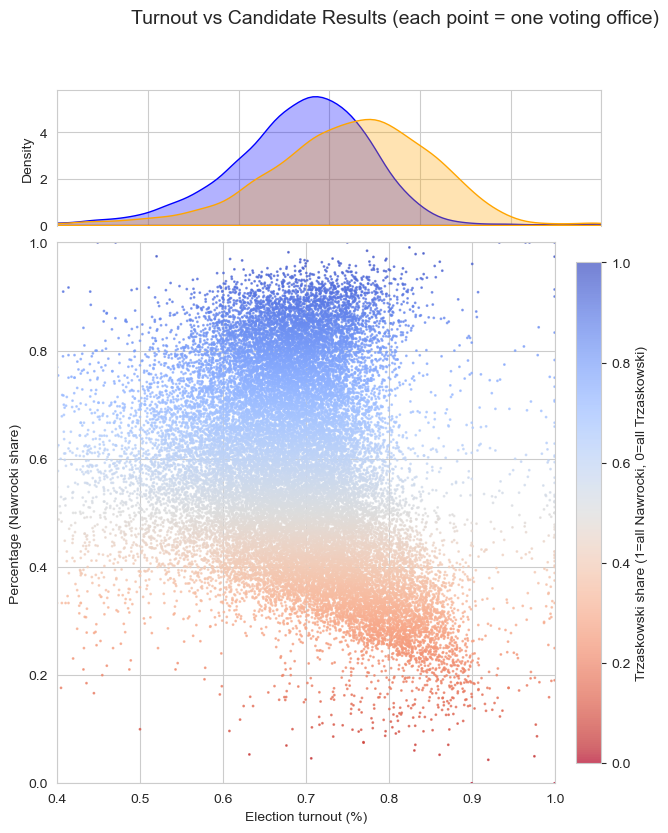

In [6]:
X = np.asarray(X)
yN = np.asarray(yN)
yT = np.asarray(yT)

sns.set_style("whitegrid")

fig = plt.figure(figsize=(9,9))
gs = fig.add_gridspec(2, 2,
                      width_ratios=(4, 1),
                      height_ratios=(1, 4),
                      hspace=0.05, wspace=0.05)

ax_joint  = fig.add_subplot(gs[1, 0])
ax_marg_x = fig.add_subplot(gs[0, 0], sharex=ax_joint)

# --- MAIN: scatter with gradient ---

# define colormap from orange -> blue
cmap = plt.colormaps["coolwarm_r"]  # reversed so orange=1, blue=0

sc = ax_joint.scatter(
    X, yN, c=yN,
    cmap=cmap, s=1, alpha=0.7
)

ax_joint.set_xlabel("Election turnout (%)")
ax_joint.set_ylabel("Percentage (Nawrocki share)")
cbar = plt.colorbar(sc, ax=ax_joint, fraction=0.046, pad=0.04)
cbar.set_label("Trzaskowski share (1=all Nawrocki, 0=all Trzaskowski)")

# --- TOP marginal: turnout KDE, split by who won ---
sns.kdeplot(x=X[yN>yT], fill=True, alpha=0.3, ax=ax_marg_x, color="blue")
sns.kdeplot(x=X[yT>yN], fill=True, alpha=0.3, ax=ax_marg_x, color="orange")
ax_marg_x.set_ylabel("Density")
plt.setp(ax_marg_x.get_xticklabels(), visible=False)

# clean spines
ax_marg_x.spines['bottom'].set_visible(False)
ax_joint.set_xlim(0.4, 1)
ax_joint.set_ylim(0, 1)

fig.suptitle("Turnout vs Candidate Results (each point = one voting office)", fontsize=14, y=0.97)
plt.show()


#### Now we can do a plot of swing vs turnout.

Text(0.5, 1.0, 'Gminy, second round of presidential elections')

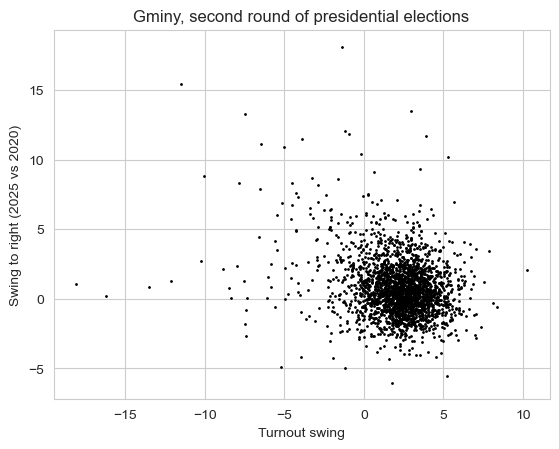

In [7]:
# Load the CSV with semicolon separator
df2025 = pd.read_csv("wyniki_gl_na_kandydatow_po_gminach_w_drugiej_turze_utf8.csv", sep=";", encoding="utf-8")
df2020 = pd.read_csv("wyniki_gl_na_kand_po_gminach_utf8.csv", sep=";", encoding="utf-8")
# Show first rows
df2025 = df2025.rename(columns = {'TERYT Gminy': 'TERYT'})
df2020 = df2020.rename(columns = {'Kod TERYT': 'TERYT'})
df2025  = df2025[['TERYT', 'Liczba wyborców uprawnionych do głosowania', 'NAWROCKI Karol Tadeusz', 'TRZASKOWSKI Rafał Kazimierz']]
df2020['TERYT'] = df2020['TERYT'].astype('float64')
df2020 = df2020[['TERYT', 'Rodzaj jednostki', 'Liczba wyborców uprawnionych do głosowania', 'Andrzej Sebastian DUDA', 'Rafał Kazimierz TRZASKOWSKI'  ]]
df2025 = df2025.rename(columns = {'Liczba wyborców uprawnionych do głosowania': 'n2025', 'NAWROCKI Karol Tadeusz': 'Nawrocki', 'TRZASKOWSKI Rafał Kazimierz': 'Trzaskowski2025'})
df2020 = df2020.rename(columns = {'Liczba wyborców uprawnionych do głosowania': 'n2020', 'Andrzej Sebastian DUDA': 'Duda', 'Rafał Kazimierz TRZASKOWSKI': 'Trzaskowski2020'})
df = pd.merge(df2025, df2020, on = 'TERYT')
df = df.replace({'gmina miejska': 1, 'gmina wiejska': 0})
df['Right Swing'] = (df['Nawrocki'] / (df['Nawrocki'] + df['Trzaskowski2025']) - df['Duda'] / (df['Duda'] + df['Trzaskowski2020']))*100
df['TurnOut Swing'] = TurnOutSwing = ((df['Nawrocki'] + df['Trzaskowski2025']) / df['n2025'] - (df['Duda'] + df['Trzaskowski2020']) / df['n2020'])*100
plt.scatter(df['TurnOut Swing'], df['Right Swing'], s=1, c = 'black')
plt.xlabel('Turnout swing')
plt.ylabel('Swing to right (2025 vs 2020)')
plt.title('Gminy, second round of presidential elections')
#print(df.iloc[2137,:])

#### Looks like a cool multivariate bell curve. Very nice, very *normal* (hehe)
#### Now let's load map file

In [8]:
# Wczytanie pliku z gminami
gminy = gpd.read_file("poland.municipalities.json")
# Podgląd kolumn, żeby wiedzieć jakie są identyfikatory (np. TERYT, nazwa gminy)
for i in range(0,len(gminy['terc'])):
    gminy.loc[i, 'terc'] = float(str(gminy['terc'][i])[:-1])
gminy = gminy.rename(columns  = {'terc' : 'TERYT'})
#print(gminy.iloc[0,:])
df = pd.merge(df, gminy, on = 'TERYT' )
#print(df.iloc[0,:-1])

#### I want a map showing swings of municipalities (Polish 'gminy')

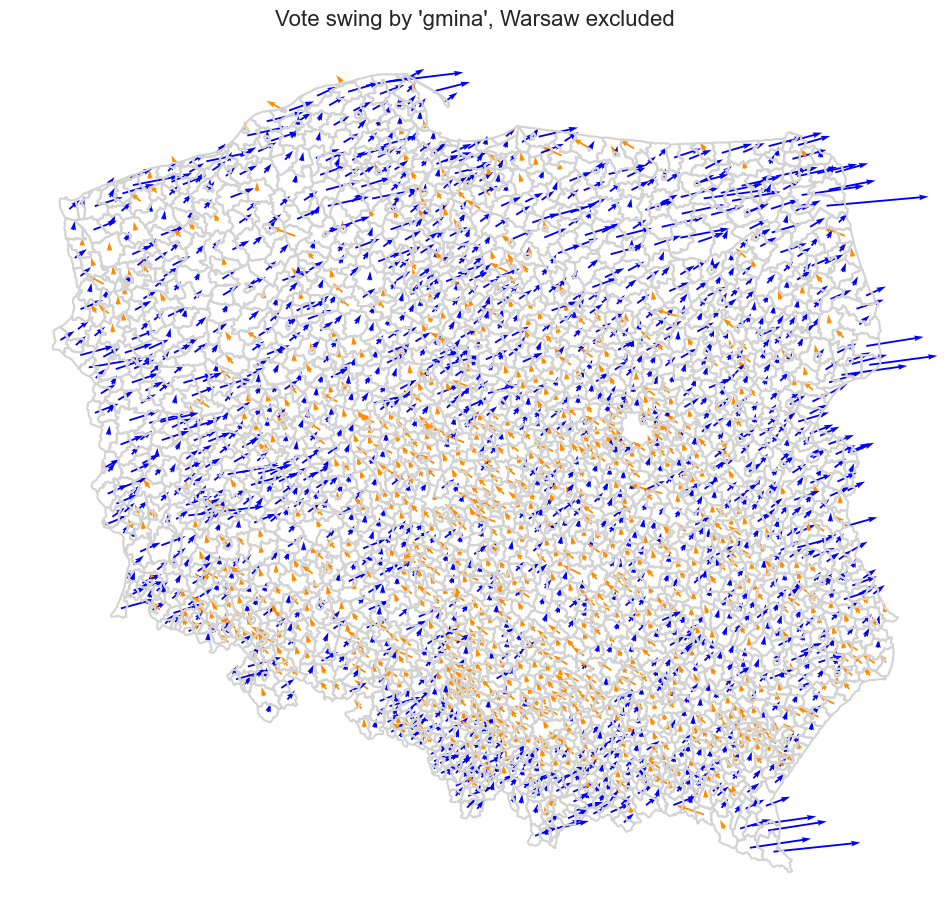

In [9]:
# assume gdf is your GeoDataFrame
gdf = df.set_geometry("geometry")
warnings.filterwarnings("ignore", message="Geometry is in a geographic CRS") #I correct it artificially
# compute centroids for arrow placement
gdf["centroid"] = gdf.centroid

# plot municipality outlines
fig, ax = plt.subplots(figsize=(12, 12))
gdf.boundary.plot(ax=ax, color="lightgrey")

# extract coordinates for arrow starting points
x = gdf["centroid"].x
y = gdf["centroid"].y
u = gdf["Right Swing"]*[1]   # horizontal component (positive = right, negative = left)
v = [1] * len(gdf)   # vertical component = 0 (arrows only left/right)
#np.sin(3*0.9*np.pi*gdf["Right Swing"]/180)
# pick colors based on swing direction
colors = ["blue" if val > 0 else "darkorange" for val in u]

# plot arrows
ax.quiver(
    x, y, u, v,
    angles="xy",
    scale_units="xy",
    scale=15,       # decrease this to make arrows longer, increase to make them shorter
    width=0.002,    # arrow thickness
    color=colors
)

# styling
ax.set_title("Vote swing by 'gmina', Warsaw excluded", fontsize=16)
ax.axis("off")

plt.show()


#### Here we goooo
#### I want the map to also show winner in each gmina

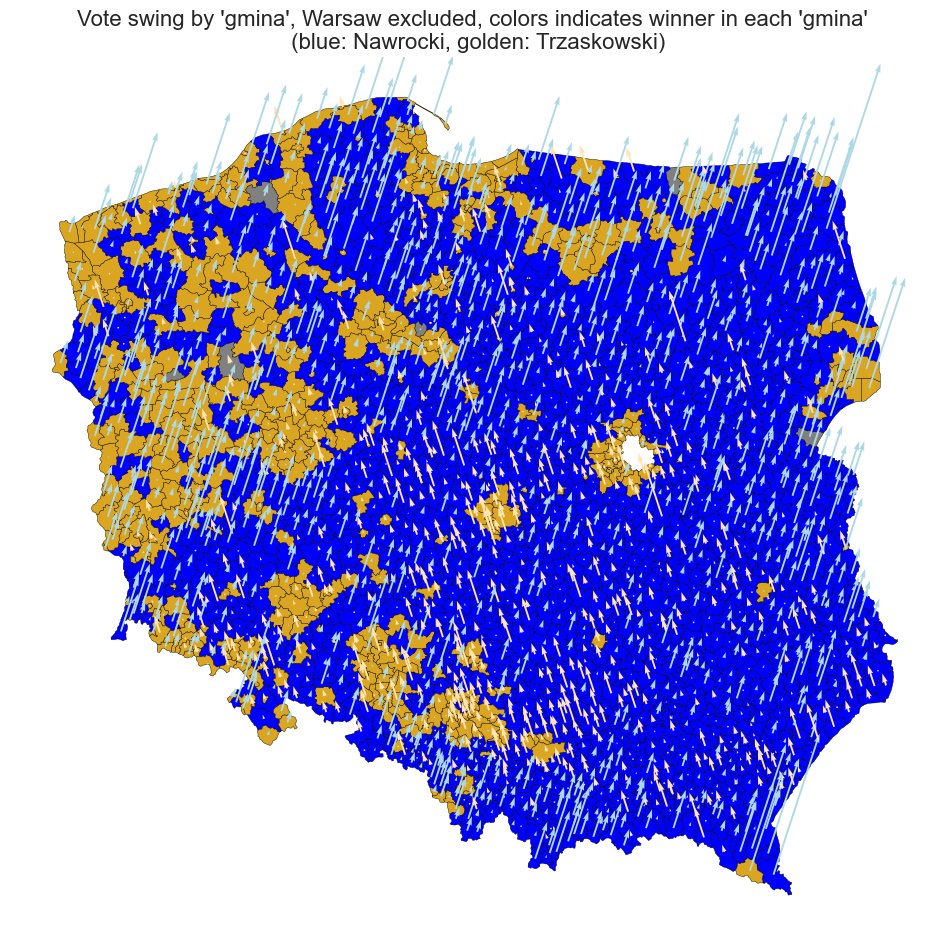

In [10]:
# make sure geometry is active
gdf = gdf.set_geometry("geometry")

# compute centroids for arrows
gdf["centroid"] = gdf.centroid

# define conditions for municipality coloring
def classify_row(row):
    if row["Trzaskowski2025"] > row["Nawrocki"] and row["Trzaskowski2020"] > row["Duda"]:
        return "goldenrod"        # Trzaskowski wins both 2020 & 2025
    elif row["Trzaskowski2025"] > row["Nawrocki"] and row["Trzaskowski2020"] < row["Duda"]:
        return "goldenrod"   # Trzaskowski wins 2025, but lost 2020
    elif row["Nawrocki"] > row["Trzaskowski2025"] and row["Duda"] > row["Trzaskowski2020"]:
        return "blue"          # right wins both 2020 & 2025
    elif row["Nawrocki"] > row["Trzaskowski2025"] and row["Duda"] < row["Trzaskowski2020"]:
        return "blue"     # right wins 2025, but lost 2020
    else:
        return "grey"          # fallback (in case of ties/missing)

gdf["color"] = gdf.apply(classify_row, axis=1)

# --- Plot map ---
fig, ax = plt.subplots(figsize=(12, 12))
gdf.plot(ax=ax, color=gdf["color"], edgecolor="black", linewidth=0.3)

# --- Add arrows ---
x = gdf["centroid"].x
y = gdf["centroid"].y
u = gdf["Right Swing"]*1*0.53   # horizontal component (positive = right, negative = left)
v = np.abs(gdf["Right Swing"])*1

# arrows: blue if swing right, orange if swing left
arrow_colors = ["lightblue" if val > 0 else "moccasin" for val in u]

#ax.quiver(
#    x, y, u, v,
#    angles="xy",
#    scale_units="xy",
#    scale=15,        # tweak for arrow length
#    width=0.0025,     # arrow thickness
#    color= 'black',
#    zorder = 2
#)
    
ax.quiver(
    x, y, u, v,
    angles="xy",
    scale_units="xy",
    scale=15,        # tweak for arrow length
    width=0.002,     # arrow thickness
    color= arrow_colors,
    zorder = 3
)

# title & cleanup
ax.set_title("Vote swing by 'gmina', Warsaw excluded, colors indicates winner in each 'gmina' \n (blue: Nawrocki, golden: Trzaskowski)", fontsize=16)
ax.axis("off")

plt.show()


#### Very cool indeed. But here we dont see population, only geography. Let's fix that!
#### This will require a lot of code tho...

In [11]:
def hexagon(center_x, center_y, size):
    """Generate hexagon Polygon centered at (center_x, center_y) with given size."""
    angles = np.linspace(0, 2 * np.pi, 7)
    x_hex = center_x + size * np.cos(angles)
    y_hex = center_y + size * np.sin(angles)
    return Polygon(zip(x_hex, y_hex))

def create_hex_grid(x0, y0, x1, y1, num_hex):
    """
    Create hexagonal grid covering a rectangle.
    
    Parameters:
        x0, y0 : float - bottom-left coordinates
        x1, y1 : float - top-right coordinates
        num_hex : int - approximate total number of hexagons
        
    Returns:
        GeoDataFrame of hexagons
    """
    width = x1 - x0
    height = y1 - y0
    
    # Estimate hexagon size from desired number of hexagons
    area_rect = width * height
    hex_area = area_rect / num_hex
    hex_size = np.sqrt((2 * hex_area) / (3 * np.sqrt(3)))
    
    dx = 3/2 * hex_size
    dy = np.sqrt(3) * hex_size
    
    hexagons = []
    centers = []
    
    col = 0
    x = x0
    while x - dx/2 <= x1:  # loop over columns
        y_start = y0 + (0 if col % 2 == 0 else dy / 2)
        y_curr = y_start
        while y_curr - dy/2 <= y1:  # loop over rows
            hexagon_poly = hexagon(x, y_curr, hex_size)
            # Only keep hexagons that intersect rectangle
            if hexagon_poly.intersects(Polygon([
                (x0, y0), (x1, y0), (x1, y1), (x0, y1)
            ])):
                hexagons.append(hexagon_poly)
                centers.append((x, y_curr))
            y_curr += dy
        col += 1
        x += dx  # shift column
        
    gdf = gpd.GeoDataFrame({
        "geometry": hexagons,
        "center_x": [c[0] for c in centers],
        "center_y": [c[1] for c in centers]
    }, crs="EPSG:4326")
    
    return gdf


In [12]:
x0, y0 = 12, 48
x1, y1 = 26, 56
num_hex = 7000
#print(gdf.head())
hex_gdf = create_hex_grid(x0, y0, x1, y1, num_hex)
#print(hex_gdf.head())
indexes_to_drop = []
for i in range(0,len(hex_gdf)):
    dist = np.sqrt(0.36*(gdf['centroid'].x.to_numpy() - hex_gdf.loc[i,'center_x'])**2 +
                   (gdf['centroid'].y.to_numpy() - hex_gdf.loc[i,'center_y'])**2)
    if np.min(dist)>0.2:
        indexes_to_drop.append(i)
hex_gdf = hex_gdf.drop(index = indexes_to_drop)
#hex_gdf.plot(edgecolor="lightgray", facecolor="none")
#plt.grid(False) 
#plt.show()

In [13]:
#Suboptimal merging :)
to_drop = []
N = len(gdf)
for i in range(N):
    if gdf.loc[i, 'n2025'] < 8000:
        min_dist = np.inf
        nearest_index = None

        for j in range(N):
            if i == j or j in to_drop:
                continue
            dist = np.sqrt(
                0.36*(gdf.loc[i, 'centroid'].x - gdf.loc[j, 'centroid'].x) ** 2 +
                (gdf.loc[i, 'centroid'].y - gdf.loc[j, 'centroid'].y) ** 2
            )
            if dist < min_dist:
                min_dist = dist
                nearest_index = j

        if nearest_index is not None:
            cols_to_sum = [
                'n2025', 'Nawrocki', 'Trzaskowski2025',
                'Trzaskowski2020', 'Duda']

            for col in cols_to_sum:
                gdf.loc[nearest_index, col] += gdf.loc[i, col]
            gdf.loc[nearest_index, 'Right Swing'] = (df.loc[nearest_index, 'Nawrocki'] / (df.loc[nearest_index, 'Nawrocki'] + df.loc[nearest_index, 'Trzaskowski2025']))
            gdf.loc[nearest_index, 'Right Swing'] += -(df.loc[nearest_index, 'Duda'] / (df.loc[nearest_index, 'Duda'] + df.loc[nearest_index, 'Trzaskowski2020']))
            if df.loc[nearest_index, 'Nawrocki'] > df.loc[nearest_index, 'Trzaskowski2025']:
                df.loc[nearest_index, 'color'] = 'blue'
            else:
                df.loc[nearest_index, 'color'] = 'goldenrod'
                

            # Weighted average centroid
            total_n = gdf.loc[nearest_index, 'n2025'] + gdf.loc[i, 'n2025']
            x_avg = (
                gdf.loc[nearest_index, 'centroid'].x * gdf.loc[nearest_index, 'n2025'] +
                gdf.loc[i, 'centroid'].x * gdf.loc[i, 'n2025']
            ) / total_n

            y_avg = (
                gdf.loc[nearest_index, 'centroid'].y * gdf.loc[nearest_index, 'n2025'] +
                gdf.loc[i, 'centroid'].y * gdf.loc[i, 'n2025']
            ) / total_n

            gdf.loc[nearest_index, 'centroid'] = Point(x_avg, y_avg)

            to_drop.append(i)

# Drop merged rows
gdf = gdf.drop(index=to_drop).reset_index(drop=True)


In [14]:
#print(gdf['n2025'].sum()/12000)
#print(gdf.head())
# New row as a dict
new_row = {"Right Swing": 32.53 - 31.79 , "centroid": Point(21., 52.)} #Adding Warsaw

# Add the row
gdf = pd.concat([gdf, pd.DataFrame([new_row])], ignore_index=True)
#print(hex_gdf['center_x'])
gdf.loc[gdf.index[-1], 'Right Swing'] = -0.74
gdf.loc[gdf.index[-1], 'color'] = 'goldenrod'
gdf.loc[gdf.index[-1], 'n2025'] = 1384869
print(gdf.iloc[137])

TERYT                                                         41810.0
n2025                                                          8955.0
Nawrocki                                                       3917.0
Trzaskowski2025                                                1973.0
Rodzaj jednostki                                                    0
n2020                                                          3610.0
Duda                                                           3810.0
Trzaskowski2020                                                2180.0
Right Swing                                                  0.014905
TurnOut Swing                                                1.462687
name                                                          Lubanie
geometry            MULTIPOLYGON (((18.86089649300004 52.703951956...
centroid                  POINT (18.89968711045013 52.73894090949851)
color                                                            blue
Name: 137, dtype: ob

In [15]:
hex_gdf['Right Swing'] = np.nan
hex_gdf['color'] = np.nan
hex_gdf['color'] = hex_gdf.get('color', pd.Series(dtype='object'))
indexes = []

for i in gdf.sort_values(by='n2025', ascending=False).index.tolist():
    centroid = gdf.loc[i, 'centroid']
    remaining = hex_gdf.drop(index=indexes)
    dist = np.sqrt(0.36*(centroid.x - remaining['center_x'].to_numpy())**2 +
                   (centroid.y - remaining['center_y'].to_numpy())**2)

    nn = gdf.loc[i, 'n2025']
    while nn > 0 and len(remaining) > 0:
        idx = remaining.index[np.argmin(dist)]  # actual index in hex_gdf
        hex_gdf.loc[idx, 'Right Swing'] = gdf.loc[i, 'Right Swing']
        hex_gdf.loc[idx, 'color'] = gdf.loc[i, 'color']
        indexes.append(idx)
        remaining = hex_gdf.drop(index=indexes)
        dist = np.sqrt(0.36*(centroid.x - remaining['center_x'].to_numpy())**2 +
                       (centroid.y - remaining['center_y'].to_numpy())**2)
        nn -= 12000

/var/folders/c1/tx7fvtcs5kn84gkdq6l3k0940000gn/T/ipykernel_86949/1243451240.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'goldenrod' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  hex_gdf.loc[idx, 'color'] = gdf.loc[i, 'color']


#### It's almost over!!!

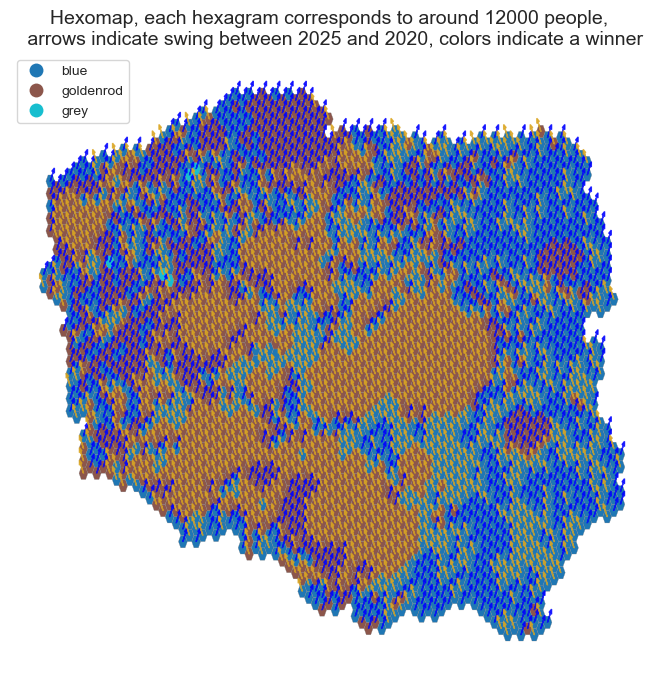

In [16]:
fig, ax = plt.subplots(figsize=(10, 8))
gdf.loc[gdf['color'] == 'blue', 'color'] = 'lightblue'
gdf.loc[gdf['color'] == 'goldenrod', 'color'] = 'moccasin'
# --- 1. Plot hexagons colored by hex_gdf['color'] ---
hex_gdf.plot(column="color", linewidth=0.2, edgecolor="gray", ax=ax, legend=True)

# --- 2. Plot arrows for Right Swing ---
for idx, row in hex_gdf.iterrows():
    swing = row["Right Swing"]
    if np.isnan(swing) or swing == 0:
        continue  # skip if no value

    x, y = row["center_x"], row["center_y"]

    # Arrow direction and color
    if swing > 0:
        dx = 0.05  # length of arrow to the right
        dy = 0.1
        color = "blue"
    else:
        dx = -0.05  # length of arrow to the left
        dy = 0.1
        color = "goldenrod"

    ax.arrow(x, y, dx, dy, head_width=0.05, head_length=0.05, width = 0.0001, fc=color, ec=color, alpha=0.8)

# --- 3. Title & styling ---
ax.set_title('Hexomap, each hexagram corresponds to around 12000 people, \n arrows indicate swing between 2025 and 2020, colors indicate a winner', fontsize=14)
ax.axis("off")

plt.show()


### Here we go!
#### Map of Poland distorted by population. We see swings in such a way that we can weigh our perceptions by population
#### Just two more plots...

In [17]:
#Warsaw Addition again
gdf.loc[gdf.index[-1], 'Nawrocki'] = 362322
gdf.loc[gdf.index[-1], 'Trzaskowski2025'] = 777353

In [18]:
xN = gdf['Nawrocki'].to_numpy()
xT = gdf['Trzaskowski2025'].to_numpy()
N  = gdf['n2025'].to_numpy()
WE = []
for i in range(0, len(gdf)):
    WE. append(gdf.loc[gdf.index[i], 'centroid'].x)
WE = np.array(WE)

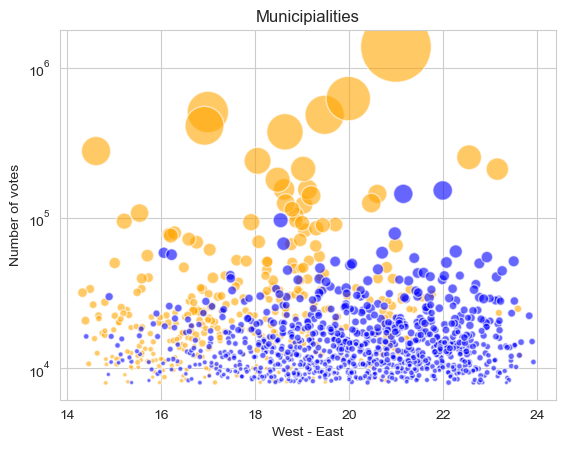

In [19]:
with np.errstate(divide='ignore', invalid='ignore'):
    s1 = np.divide(
        xT * (np.maximum(xT, xN) - xN),
        (xT - xN),
        out=np.zeros_like(xT, dtype=float),
        where=(xT - xN) != 0
    ) / 300

    s2 = np.divide(
        xN * (np.maximum(xT, xN) - xT),
        (xN - xT),
        out=np.zeros_like(xN, dtype=float),
        where=(xN - xT) != 0
    ) / 300

plt.scatter(WE, N, s=s1, alpha=0.6, edgecolors='w', c='orange')
plt.scatter(WE, N, s=s2, alpha=0.6, edgecolors='w', c='blue')
plt.yscale('log')
plt.xlabel("West - East")
plt.ylabel("Number of votes")
plt.title("Municipialities")
plt.grid(True)
plt.show()

#### This plot explains well two of the main factors in polish politics, city-rural divide and west-east divide.
#### Now we can do the another handy plot (see https://novayagazeta.eu/articles/2024/03/21/fake-it-till-you-make-it-en)

In [20]:
# Load the CSV with semicolon separator
df2 = pd.read_csv("wyniki_gl_na_kandydatow_po_gminach_utf8.csv", sep=";", encoding="utf-8")
#print(df.head())

In [37]:
G = df2.iloc[:,7].to_numpy()
N = df2.iloc[:,36].to_numpy()
T = df2.iloc[:,39].to_numpy()
V = df2.iloc[:,9].to_numpy()
X = V / G
yT = T / V
yN = N  / V

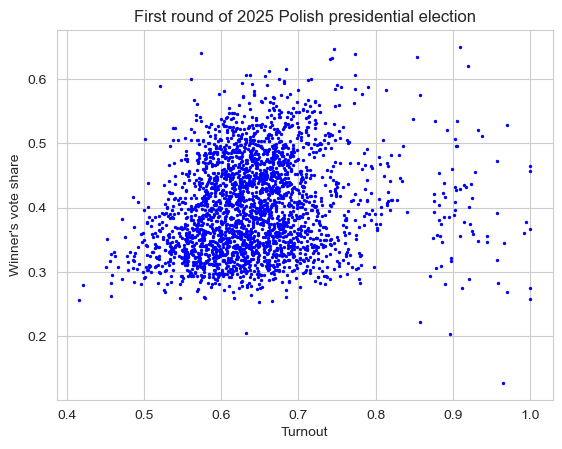

In [38]:
plt.scatter(X, np.maximum(yT,yN), s=2, c = 'blue')
plt.xlabel('Turnout')
plt.ylabel("Winner's vote share")
plt.title("First round of 2025 Polish presidential election")
plt.show()

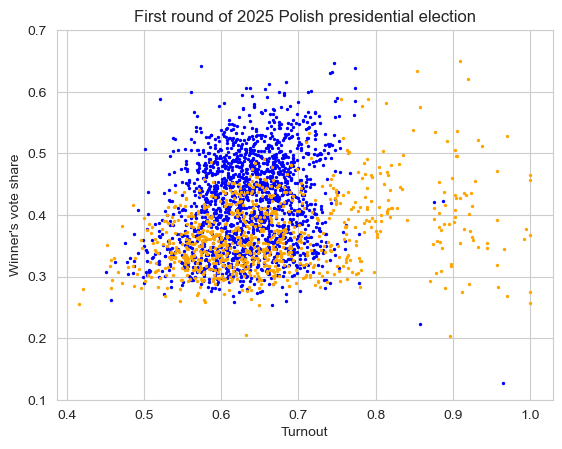

In [43]:
plt.scatter(X, (np.maximum(yT,yN) - yT)*yN/(yN - yT), s=2, c = 'blue', label = 'Nawrocki')
plt.scatter(X, (np.maximum(yT,yN) - yN)*yT/(yT - yN), s=2, c = 'orange', label = 'Trzaskowski')
plt.ylim(0.1,0.7)
plt.xlabel('Turnout')
plt.ylabel("Winner's vote share")
plt.title("First round of 2025 Polish presidential election")
plt.show()

In [36]:
print(max(yT))

0.65


In [35]:
print(df2.columns)

Index(['TERYT Gminy', 'Gmina', 'Powiat', 'Województwo', 'Liczba komisji',
       'Liczba uwzględnionych komisji', 'Komisja otrzymała kart do głosowania',
       'Liczba wyborców uprawnionych do głosowania',
       'Nie wykorzystano kart do głosowania',
       'Liczba wyborców, którym wydano karty do głosowania w lokalu wyborczym',
       'Liczba wyborców, którym wysłano pakiety wyborcze',
       'Liczba wyborców, którym wydano karty do głosowania w lokalu wyborczym oraz w głosowaniu korespondencyjnym (łącznie)',
       'Liczba wyborców głosujących przez pełnomocnika',
       'Liczba wyborców głosujących na podstawie zaświadczenia o prawie do głosowania',
       'Liczba otrzymanych kopert zwrotnych',
       'Liczba kopert zwrotnych, w których nie było oświadczenia o osobistym i tajnym oddaniu głosu',
       'Liczba kopert zwrotnych, w których oświadczenie nie było podpisane',
       'Liczba kopert zwrotnych, w których nie było koperty na kartę do głosowania',
       'Liczba kopert zwrot